# Content based book recommendation

As first step, we will retrieve list of all text files present in the datasets/ folder and sort it alphabetically

In [1]:
# Import library
import glob

# The books files are contained in this folder
folder = "datasets/"

# List all the .txt files and sort them alphabetically
files = glob.glob(folder + "*.txt")
files.sort()
print(files)

['datasets\\Autobiography.txt', 'datasets\\CoralReefs.txt', 'datasets\\DescentofMan.txt', 'datasets\\DifferentFormsofFlowers.txt', 'datasets\\EffectsCrossSelfFertilization.txt', 'datasets\\ExpressionofEmotionManAnimals.txt', 'datasets\\FormationVegetableMould.txt', 'datasets\\FoundationsOriginofSpecies.txt', 'datasets\\GeologicalObservationsSouthAmerica.txt', 'datasets\\InsectivorousPlants.txt', 'datasets\\LifeandLettersVol1.txt', 'datasets\\LifeandLettersVol2.txt', 'datasets\\MonographCirripedia.txt', 'datasets\\MonographCirripediaVol2.txt', 'datasets\\MovementClimbingPlants.txt', 'datasets\\OriginofSpecies.txt', 'datasets\\PowerMovementPlants.txt', 'datasets\\VariationPlantsAnimalsDomestication.txt', 'datasets\\VolcanicIslands.txt', 'datasets\\VoyageBeagle.txt']


Next, we will create a Corpus and load the content of these books and do some basic pre-processing by removing non-alphanumeric characters. We will also store the titles for these books for future reference and print their respective length to get a gauge for their contents.

In [2]:
# Import libraries
import re, os

# Initialize the object that will contain the texts and titles
txts = []
titles = []

for n in files:
    # Open each file
    f = open(n, encoding='utf-8-sig')
    # Remove all non-alpha-numeric characters
    data = re.sub('[\W_]+', ' ', f.read())
    # Store the texts and titles of the books in two separate lists
    txts.append(data)
    titles.append(os.path.basename(n).replace(".txt", ""))
    
# Print the length, in characters, of each book
[len(t) for t in txts]

[123231,
 496068,
 1776539,
 617088,
 913713,
 624232,
 335920,
 523021,
 797401,
 901406,
 1047518,
 1010643,
 767492,
 1660866,
 298319,
 916267,
 1093567,
 1043499,
 341447,
 1149574]

We will browse the list containing title of all books and store index of the book whose similar book we want to find.

In [3]:
# Browse the list containing all the titles
ori=0
for i in range(len(titles)):
    # Store the index if the title is "OriginofSpecies"
    if titles[i]=="OriginofSpecies" : 
        ori=i
        break
# Print the stored index
print(ori)

15


Further, we will tokenize our corpus by transforming each text into tokens.The text contains some words which are not useful for our analysis.In this step , we shall also eliminate those words from our analysis.

In [4]:
# Define a list of stop words
stoplist = set('for a of the and to in to be which some is at that we i who whom show via may my our might as well'.split())

# Convert the text to lower case 
txts_lower_case = [ var.lower() for var in txts]

# Transform the text into tokens 
txts_split = [line.split() for line in txts_lower_case]

# Remove tokens which are part of the list of stop words
texts =[[word for word in txt if word not in stoplist]for txt in txts_split]

# Print the first 20 tokens for the "On the Origin of Species" book
print(texts[ori][0:20])

['on', 'origin', 'species', 'but', 'with', 'regard', 'material', 'world', 'can', 'least', 'go', 'so', 'far', 'this', 'can', 'perceive', 'events', 'are', 'brought', 'about']


Sometimes different words refer to a similar concept. For example, the concept of requirement can be described by words such as requirement, required or requires. This will dilute the weight given to this concept in the book and potentially bias the results of the analysis. To avoid this ,we will perform stemming process which will group together the inflected forms of a word so they can be analysed as a single item: the stem.

In [5]:
from nltk.stem import PorterStemmer 

# Create an instance of a PorterStemmer object 
porter = PorterStemmer()

# For each token of each text, we generated its stem
texts_stem = [[porter.stem(token) for token in text] for text in texts]

# Print the 20 first stemmed tokens from the "On the Origin of Species" book
texts_stem[ori][0:20]

['on',
 'origin',
 'speci',
 'but',
 'with',
 'regard',
 'materi',
 'world',
 'can',
 'least',
 'go',
 'so',
 'far',
 'thi',
 'can',
 'perceiv',
 'event',
 'are',
 'brought',
 'about']

Next, we will create a universe of all words contained in our corpus of Charles Darwin's books, which we call a "dictionary". Then, using the stemmed tokens and the dictionary, we will create bag-of-words models (BoW) of each of our texts. The BoW models will represent our books as a list of all uniques tokens they contain associated with their respective number of occurrences.

In [6]:
# Load the functions allowing to create and use dictionaries
from gensim import corpora 

# Create a dictionary from the stemmed tokens
dictionary = corpora.Dictionary(texts_stem)
print("dictionary : ",dictionary)

# Create a bag-of-words model for each book, using the previously generated dictionary
bows = [dictionary.doc2bow(text) for text in texts_stem]


# Print the first five elements of the On the Origin of species' BoW model
bows[ori][0:5]

dictionary :  Dictionary(28538 unique tokens: ['1', '11th', '1250', '12th', '13th']...)


[(0, 11), (5, 51), (6, 1), (8, 2), (21, 1)]

We will convert the BoW model into a DataFrame for our better understanding.
DataFrame contains columns named index ,occurrences and token containing the stemmed token corresponding to the dictionary index. We will sort the DataFrame by descending number of occurrences.


In [7]:
# Import pandas to create and manipulate DataFrames
import pandas as pd

# Convert the BoW model for "On the Origin of Species" into a DataFrame
df_bow_origin = pd.DataFrame(bows[ori])

# Add the column names to the DataFrame
df_bow_origin.columns = ["index", "occurrences"]

# Add a column containing the token corresponding to the dictionary index
df_bow_origin["token"] = [dictionary[index] for index in df_bow_origin["index"]]

# Sort the DataFrame by descending number of occurrences and print the first 10 values
df_bow_origin.sort_values(by="occurrences", ascending=False).head(10)

,index,occurrences,token
748,1168,2023,have
1119,1736,1558,on
1489,2288,1543,speci
892,1366,1480,it
239,393,1362,by
1128,1747,1201,or
125,218,1140,are
665,1043,1137,from
1774,2703,1000,with
1609,2452,962,thi


The most recurring words are, apart from few exceptions, very common and unlikely to carry any information peculiar to the given book. We need to use an additional step in order to determine which tokens are the most specific to a book.
To do so, we will use a tf-idf model (term frequency–inverse document frequency). This model defines the importance of each word depending on how frequent it is in this text and how infrequent it is in all the other documents. As a result, a high tf-idf score for a word will indicate that this word is specific to this text.

In [8]:
# Load the gensim functions that will allow us to generate tf-idf models
from gensim.models import TfidfModel

# Generate the tf-idf model
model = TfidfModel(bows)

# Print the model for "On the Origin of Species"
# ... YOUR CODE FOR TASK 8 ...
model[bows[ori]]

[(8, 0.00020408683039616044),
 (21, 0.0005723177174474165),
 (23, 0.001714008058633542),
 (27, 0.0006466337090765656),
 (28, 0.0025710120879503125),
 (31, 0.000857004029316771),
 (35, 0.001016241827361025),
 (36, 0.001016241827361025),
 (51, 0.0008878482198272165),
 (54, 0.00203248365472205),
 (56, 0.0023786863377481767),
 (57, 0.00010204341519808022),
 (63, 0.0027579084706411254),
 (64, 0.000510217075990401),
 (66, 0.00020408683039616044),
 (67, 0.0023786863377481767),
 (68, 0.00203248365472205),
 (75, 0.0013789542353205627),
 (76, 0.00044392410991360827),
 (78, 0.004177054182752995),
 (80, 0.0020885270913764977),
 (83, 0.008584765761711247),
 (84, 0.000510217075990401),
 (88, 0.0024490419647539255),
 (89, 0.0033674327015366474),
 (90, 0.0008878482198272165),
 (91, 0.0016768424759030323),
 (94, 0.0008878482198272165),
 (95, 0.00044392410991360827),
 (96, 0.003551392879308866),
 (97, 0.0016326946431692835),
 (102, 0.03773354934265671),
 (104, 0.0009183907367827219),
 (106, 0.0014191457

The format of those results is hard to interpret for a human. Therefore, we will transform it into a more readable version using a DataFrame with columns- id, score and tokens(tokens corresponding to the numerical indices).

In [9]:
# Convert the tf-idf model for "On the Origin of Species" into a DataFrame
df_tfidf = pd.DataFrame(model[bows[ori]])

# Name the columns of the DataFrame id and score
df_tfidf.columns=["id", "score"]

# Add the tokens corresponding to the numerical indices for better readability
df_tfidf['token'] = [dictionary[i] for i in list(df_tfidf["id"])]

# Sort the DataFrame by descending tf-idf score and print the first 10 rows.
df_tfidf.sort_values(by="score", ascending=False).head(10)

,id,score,token
880,2164,0.327823,select
3103,10108,0.204162,pigeon
128,369,0.197968,breed
2985,9395,0.167705,migrat
947,2325,0.148371,steril
285,752,0.146172,domest
504,1255,0.128433,hybrid
371,966,0.127694,fertil
3840,16046,0.124547,gärtner
3536,12729,0.121348,naturalis


Now that we have a model associating tokens to how specific they are to each book, we can measure how related to books are between each other. We will use a measure of similarity called cosine similarity and we will visualize the results as a distance matrix, i.e., a matrix showing all pairwise distances between Darwin's books. We shall also convert the resulting object as a list and then transform it into a DataFrame.

In [10]:
# Load the library allowing similarity computations
from gensim import similarities

# Compute the similarity matrix (pairwise distance between all texts)
sims = similarities.MatrixSimilarity(model[bows])
#print(sims)

# Transform the resulting list into a DataFrame
sim_df = pd.DataFrame(list(sims))

# Add the titles of the books as columns and index of the DataFrame
sim_df.columns = titles
sim_df.index = titles

# Print the resulting matrix
sim_df

,Autobiography,CoralReefs,DescentofMan,DifferentFormsofFlowers,EffectsCrossSelfFertilization,ExpressionofEmotionManAnimals,FormationVegetableMould,FoundationsOriginofSpecies,GeologicalObservationsSouthAmerica,InsectivorousPlants,LifeandLettersVol1,LifeandLettersVol2,MonographCirripedia,MonographCirripediaVol2,MovementClimbingPlants,OriginofSpecies,PowerMovementPlants,VariationPlantsAnimalsDomestication,VolcanicIslands,VoyageBeagle
Autobiography,1.000000,0.049722,0.080789,0.066615,0.077006,0.089345,0.041182,0.058990,0.030679,0.014945,0.399534,0.220023,0.005854,0.008456,0.022999,0.101199,0.016059,0.048989,0.038630,0.184288
CoralReefs,0.049722,1.000000,0.009516,0.001980,0.001936,0.005062,0.029445,0.022066,0.060744,0.002284,0.031211,0.017772,0.006321,0.010497,0.001534,0.039200,0.002686,0.011383,0.057402,0.267414
DescentofMan,0.080789,0.009516,1.000000,0.072792,0.029997,0.148642,0.027106,0.135001,0.009628,0.009468,0.060040,0.080569,0.053426,0.042937,0.005157,0.267734,0.011267,0.228437,0.007885,0.123902
DifferentFormsofFlowers,0.066615,0.001980,0.072792,1.000000,0.391788,0.006545,0.010621,0.039993,0.002855,0.007487,0.016188,0.046692,0.009403,0.005451,0.008165,0.129152,0.018831,0.049405,0.002624,0.013213
EffectsCrossSelfFertilization,0.077006,0.001936,0.029997,0.391788,1.000000,0.006871,0.032270,0.040248,0.002247,0.006763,0.019609,0.046567,0.003218,0.002957,0.014939,0.146700,0.039520,0.054458,0.002183,0.017183
ExpressionofEmotionManAnimals,0.089345,0.005062,0.148642,0.006545,0.006871,1.000000,0.021066,0.047103,0.005246,0.011461,0.065391,0.049333,0.016802,0.029644,0.005942,0.063242,0.011234,0.082567,0.005595,0.099124
FormationVegetableMould,0.041182,0.029445,0.027106,0.010621,0.032270,0.021066,1.000000,0.021468,0.067712,0.035498,0.028357,0.023943,0.019864,0.023915,0.038823,0.049519,0.039911,0.032647,0.059299,0.098331
FoundationsOriginofSpecies,0.058990,0.022066,0.135001,0.039993,0.040248,0.047103,0.021468,1.000000,0.027300,0.005995,0.057749,0.054703,0.007650,0.010762,0.003971,0.322736,0.008712,0.196578,0.017528,0.089075
GeologicalObservationsSouthAmerica,0.030679,0.060744,0.009628,0.002855,0.002247,0.005246,0.067712,0.027300,1.000000,0.006844,0.028691,0.012241,0.009260,0.023486,0.002046,0.052878,0.003450,0.013737,0.372272,0.259514
InsectivorousPlants,0.014945,0.002284,0.009468,0.007487,0.006763,0.011461,0.035498,0.005995,0.006844,1.000000,0.006062,0.016549,0.019091,0.019657,0.249011,0.014982,0.022841,0.010321,0.008526,0.014758


Now, we will display which books are the most similar to "On the Origin of Species," more specifically we will produce a bar chart showing all books ranked by how similar they are to Darwin's landmark work.

Text(0.5, 1.0, "Most similar books to 'On the Origin of Species'")

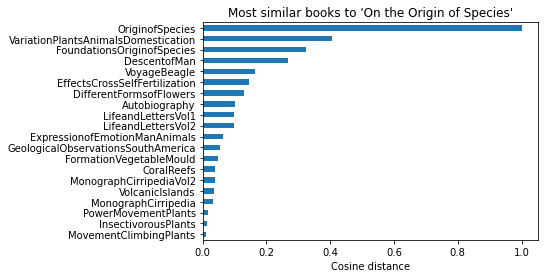

In [11]:
# This is needed to display plots in a notebook
%matplotlib inline

# Import the needed functions from matplotlib
import matplotlib.pyplot as plt

# Select the column corresponding to "On the Origin of Species" and 
v = sim_df["OriginofSpecies"]

# Sort by ascending scores
v_sorted = v.sort_values(ascending=True)

# Plot this data has a horizontal bar plot
v_sorted.plot.barh(x='lab', y='val', rot=0).plot()

# Modify the axes labels and plot title for better readability
plt.xlabel("Cosine distance")
plt.ylabel("")
plt.title("Most similar books to 'On the Origin of Species'")

As the final step, we will represent the whole similarity matrix as a dendrogram to have a better understanding of the big picture and see how Darwin's books are generally related to each other

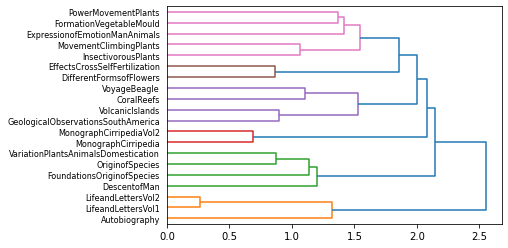

In [12]:
# Import libraries
from scipy.cluster import hierarchy

# Compute the clusters from the similarity matrix,
# using the Ward variance minimization algorithm
Z = hierarchy.linkage(sim_df, 'ward')

# Display this result as a horizontal dendrogram
a = hierarchy.dendrogram(Z,  leaf_font_size=8, labels=sim_df.index,orientation="right" )